In [15]:
import shutil
from zipfile import ZipFile as zf

SEED = 101

with zf('Clinic.zip','r') as zin:
    zin.extractall()
    shutil.rmtree('25yjwbphn4-1')

In [16]:
import pandas as pd

df = pd.read_csv('Dataset.csv',encoding='utf-8')
medications = pd.read_csv('Medicationkey.csv')

df.rename(columns={'ID': 'Patient'}, inplace=True)
df.set_index('Patient',inplace=True)
medications.set_index('Medication', inplace=True)

old_columns = medications.values.flatten()
new_columns = medications.index

for old, new in zip(old_columns, new_columns):
    df.rename(columns={old: new}, inplace=True)

In [17]:
df.columns

Index(['GENDER', 'AGE', 'RACE/ETHNICITY', 'Diagnosis', 'MD', 'Assignment',
       'EMR', 'LOS', 'RAR', 'AMITRIPTYLINE', 'ARIPIPRAZOLE', 'ASENAPINE',
       'BUPROPION', 'CHLORPROMAZINE', 'CITALOPRAM', 'CLOMIPRAMINE',
       'CLONIDINE', 'DOXEPIN', 'DULOXETINE', 'ESCITALOPRAM', 'FLUOXETINE',
       'FLUPHENAZINE', 'FLUVOXAMINE', 'GUANFACINE', 'HALOPERIDOL',
       'IMIPRAMINE', 'LITHIUM CARBONATE', 'METHYLPHENIDATE', 'MIRTAZAPINE',
       'NORTRIPTYLINE', 'OLANZAPINE', 'PALIPERIDONE', 'PERPHENAZINE',
       'QUETIAPINE', 'RISPERIDONE', 'SERTRALINE', 'TRAZODONE', 'VENLAFAXINE',
       'ZIPRASIDONE', '# Psychotropic Medications', '# Administrations',
       'Therapeutic Guidances'],
      dtype='object')

In [79]:
df.rename(columns={'# Administrations': 'Administrations'}, inplace=True)
df.rename(columns={'# Psychotropic Medications': 'Psychotropics'}, inplace=True)

In [29]:
df[df.columns[df.isnull().any()]].isnull().sum()

Assignment               41
Therapeutic Guidances    41
dtype: int64

In [48]:
# Fill NaN with the most frequent value for each category
# Note: mode() is the same as doing df[c].value_counts().index[0]
df["Therapeutic Guidances"].mode().iloc[0]
df["Assignment"].fillna(df["Assignment"].mode().iloc[0], inplace=True)
df["Therapeutic Guidances"].fillna(df["Therapeutic Guidances"].mode().iloc[0], inplace=True)

In [56]:
df.groupby(['RAR']).count().transpose().head(1)

RAR,0,1
GENDER,1358,142


Discharged people : 1358 Recurrent people: 142 with a 9.56 imbalance


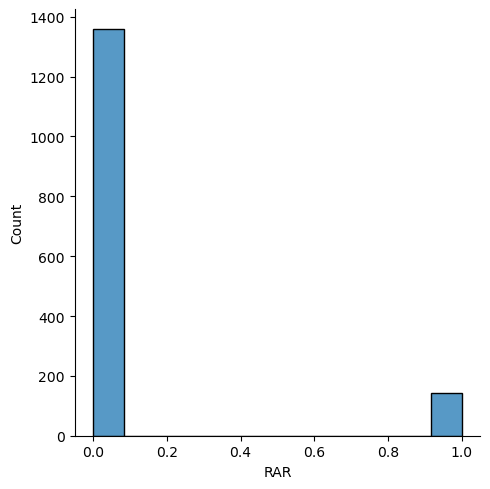

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

discharged_ppl,recurrent_ppl = df['RAR'].value_counts()
imbalance_ratio = np.around(discharged_ppl / recurrent_ppl,2)
print(f'Discharged people : {discharged_ppl} Recurrent people: {recurrent_ppl} with a {imbalance_ratio} imbalance')
sns.displot(df['RAR'])

(0.0, 2914.5000000000005)

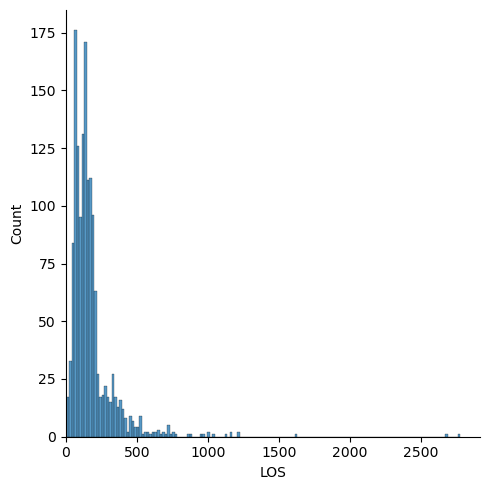

In [65]:
# Let's try to focus on another outcome

sns.displot(df['LOS'])

In [72]:
df['LOS'].describe()

count    1500.000000
mean      176.520667
std       174.259930
min         6.000000
25%        90.000000
50%       138.000000
75%       191.250000
max      2776.000000
Name: LOS, dtype: float64

<Axes: xlabel='LOS', ylabel='# Administrations'>

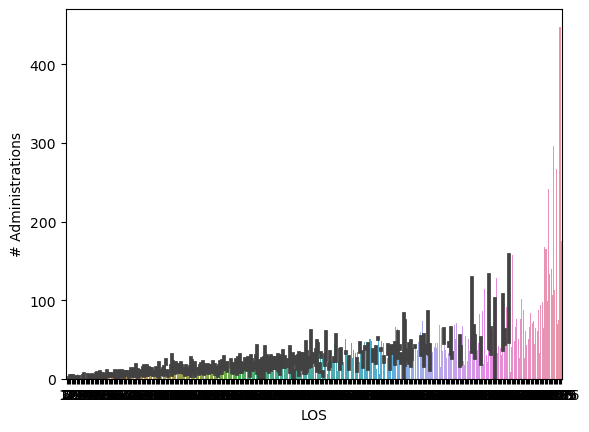

In [77]:
sns.barplot(data=df,x='LOS',y='Administrations')

In [ ]:
# There seems to be a correlation between the length of stay (LOS) and the amount of medications patients had to take
